# **Importing Libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization

# Data Cleaning and Preparation
from category_encoders import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# Model Performance and Spliting
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#Modeling Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# ExplainableAI
import shap
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')

2024-04-15 12:00:43.381956: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 12:00:43.382138: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 12:00:43.577571: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **Data Info**

In [2]:
df = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
test_df = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")
test_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
print("Size of train_df - ", df.shape)
print("Size of test_df - ", test_df.shape)

Size of train_df -  (2000, 21)
Size of test_df -  (2000, 21)


In [5]:
(df==test_df).any()

battery_power    True
blue             True
clock_speed      True
dual_sim         True
fc               True
four_g           True
int_memory       True
m_dep            True
mobile_wt        True
n_cores          True
pc               True
px_height        True
px_width         True
ram              True
sc_h             True
sc_w             True
talk_time        True
three_g          True
touch_screen     True
wifi             True
price_range      True
dtype: bool

> The two datasets are exactly the same.

In [6]:
df.shape

(2000, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


# **Exploratory Data Analysis**

In [9]:
df.duplicated().any()

False

In [10]:
df.isnull().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

In [11]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [12]:
"""for i in df.columns:
    print(df[i].value_counts())"""  # Used to determine categorical_variables
    
categorical_variables = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']

In [13]:
numerical_variables = list(set(df.columns.tolist()) - set(categorical_variables))
numerical_variables

['pc',
 'fc',
 'battery_power',
 'clock_speed',
 'sc_w',
 'int_memory',
 'sc_h',
 'ram',
 'n_cores',
 'px_width',
 'mobile_wt',
 'px_height',
 'm_dep',
 'talk_time']

## **Data Visualization**

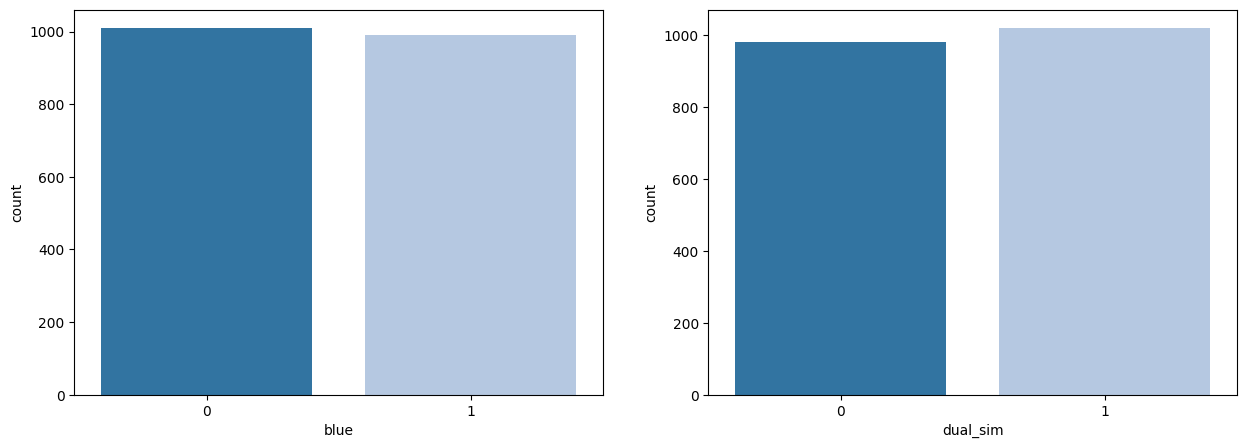

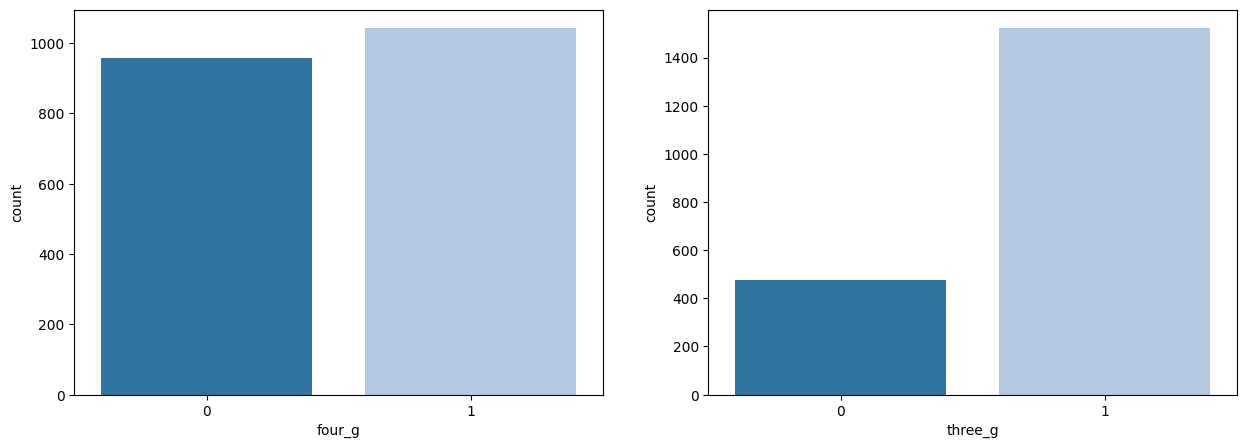

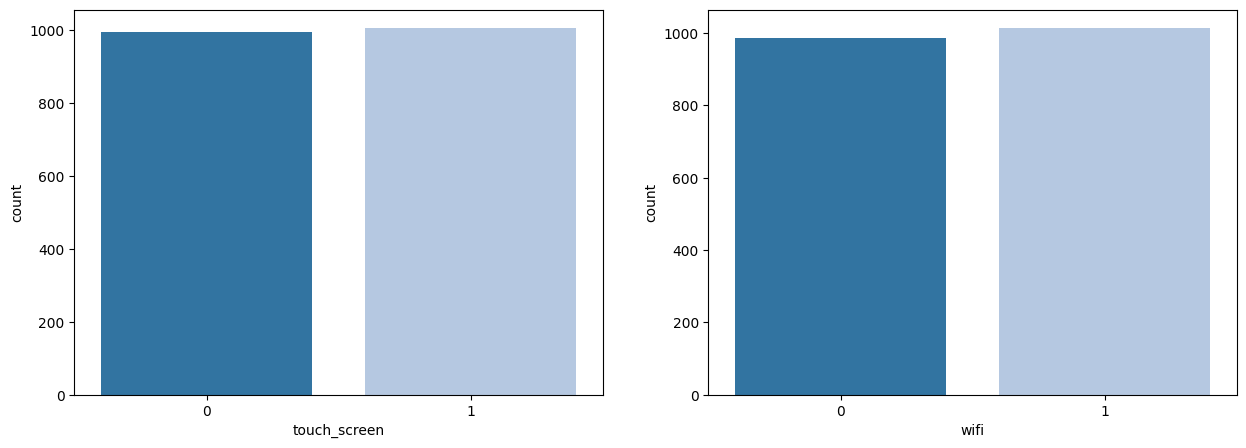

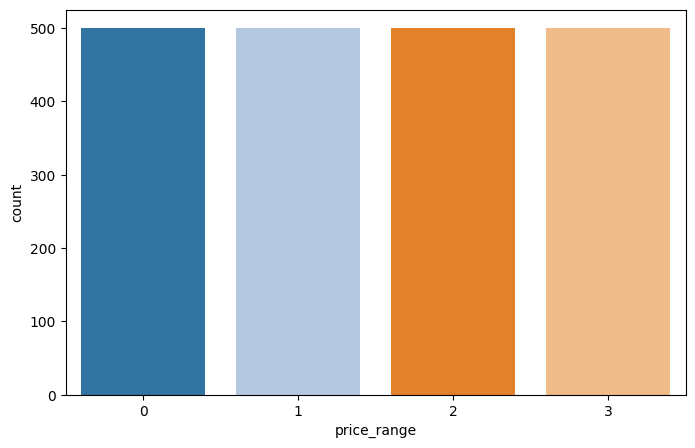

In [14]:
for i in range(0, len(categorical_variables),2):
    df[categorical_variables[i]] = df[categorical_variables[i]].astype('object')
    if i+1==len(categorical_variables):
        plt.figure(figsize=(8,5))
        sns.countplot(x=df[categorical_variables[i]], palette='tab20')
        plt.show();
    else:
        df[categorical_variables[i+1]] = df[categorical_variables[i+1]].astype('object')
        figure, axis = plt.subplots(nrows=1, ncols = 2, figsize=(15,5))
        sns.countplot(ax=axis[0], x=df[categorical_variables[i]], palette='tab20')
        sns.countplot(ax=axis[1], x=df[categorical_variables[i+1]], palette='tab20')
        plt.show();

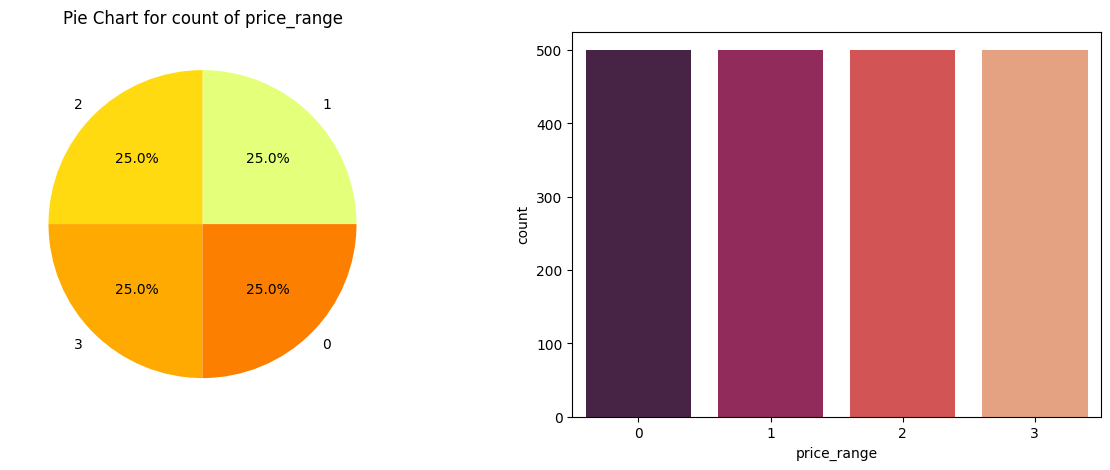

In [15]:
figure, axis = plt.subplots(nrows=1, ncols = 2, figsize=(15,5))
df['price_range'].value_counts().plot.pie(ax=axis[0], autopct='%1.1f%%',title="Pie Chart for count of price_range", 
                                  legend=False, colormap='Wistia', startangle=0,  ylabel='')        # explode=(0.01, 0.05, 0.05, 0.05),
sns.countplot(data=df, x='price_range', palette="rocket")
plt.show();

### **Correlation Matrix**

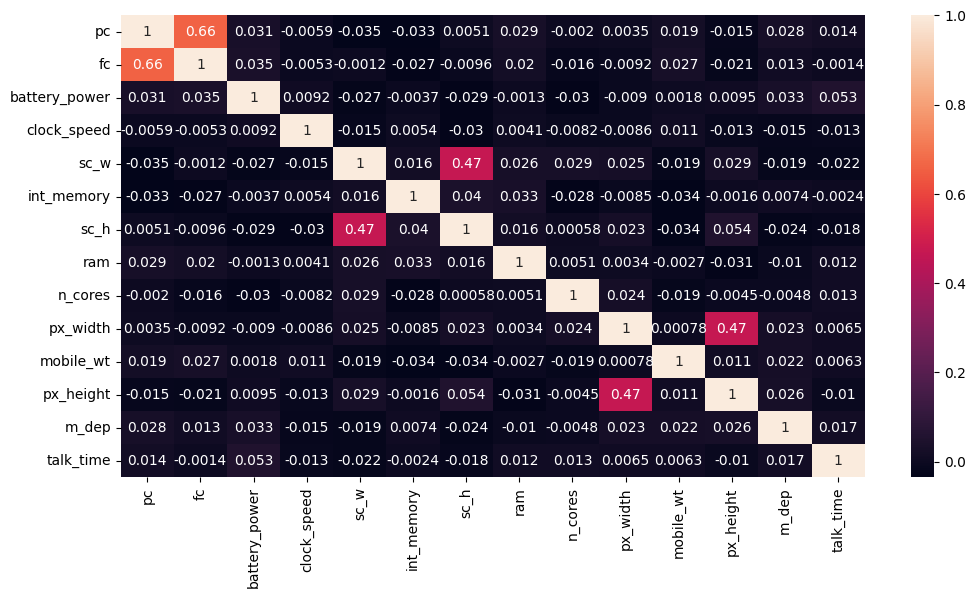

In [16]:
correlation_matrix = df[numerical_variables].corr(method='spearman')
df.corr()
plt.subplots(figsize=(12,6))
sns.heatmap(data = correlation_matrix, annot=True)
plt.show()

> ### Columns "fc", and "pc" are highly correlated. So, one of them can be dropped

In [17]:
df.drop(labels='fc', axis=1, inplace=True)
numerical_variables.remove('fc')

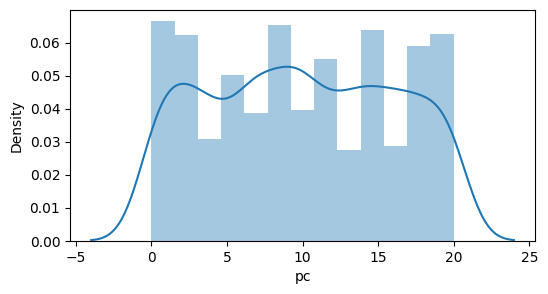

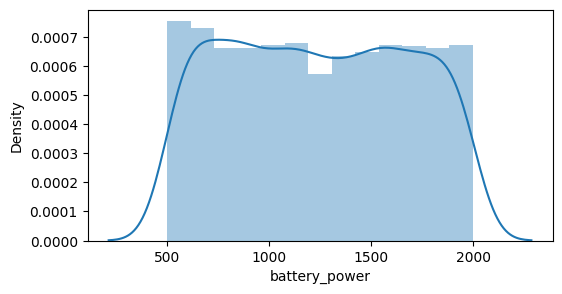

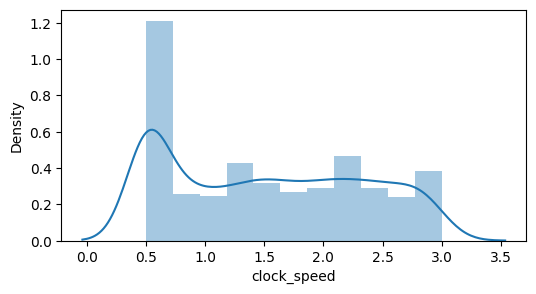

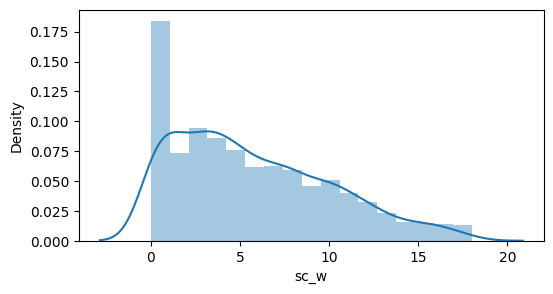

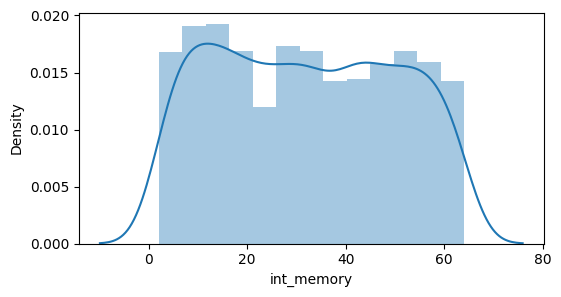

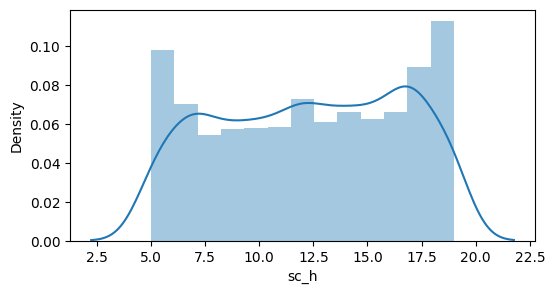

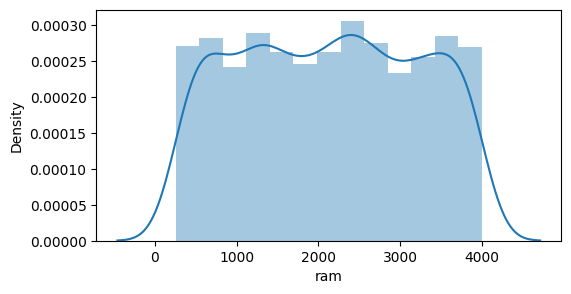

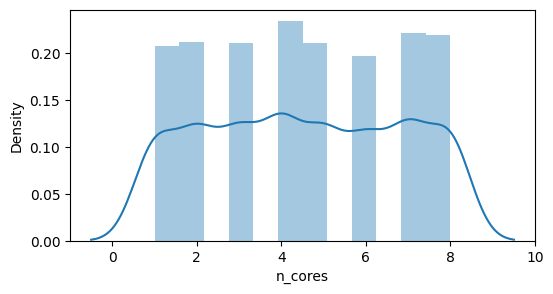

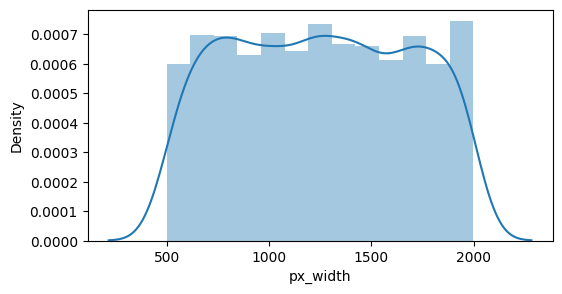

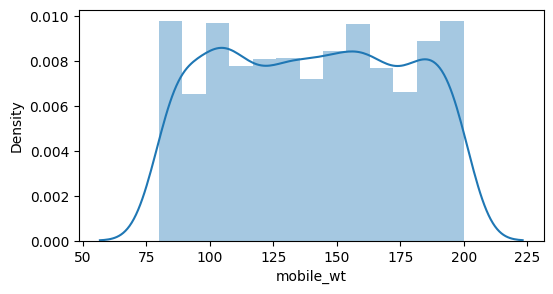

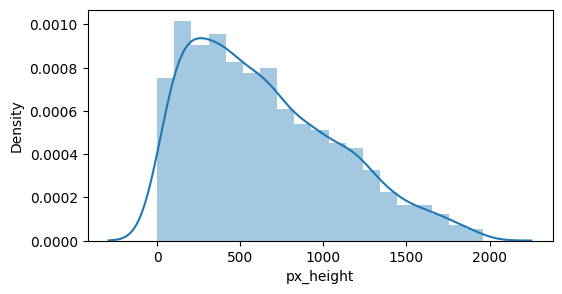

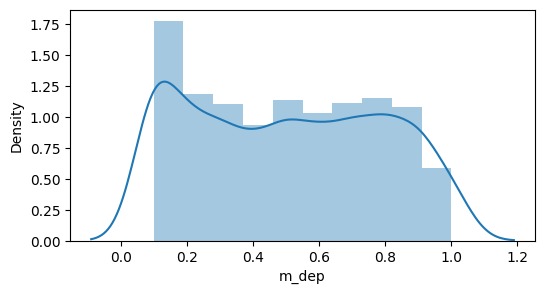

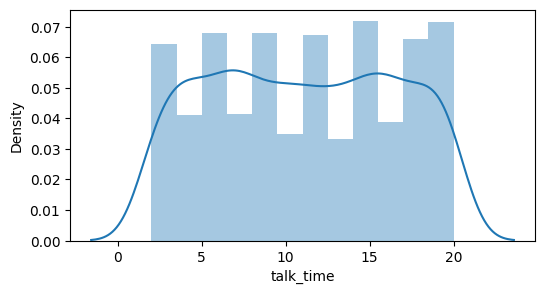

In [18]:
for i in numerical_variables:
    plt.figure(figsize=(6,3))
    sns.distplot(df[i])
    plt.show()

# **Machine Learning Section**

In [19]:
df.head()

,battery_power,blue,clock_speed,dual_sim,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


### **Scaling Numerical Data**

In [20]:
transformer = MinMaxScaler()
scaled_df = df.copy()

def scaling(numerical_variables):
    return transformer.fit_transform(scaled_df[numerical_variables].values.reshape(-1,1))

for i in numerical_variables:
    scaled_df[i] = scaling(i)

scaled_df.head()

,battery_power,blue,clock_speed,dual_sim,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0,0.68,0,0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0,0,1,1
1,0.347361,1,0.00,1,1,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1,1,0,2
2,0.041416,1,0.00,1,1,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1,1,0,2
3,0.076152,1,0.80,0,0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1,0,0,2
4,0.881764,1,0.28,0,1,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1,1,0,1


### **Train-Test Split**

In [21]:
y = scaled_df['price_range'].astype('int')                                         # keeping <price_range> as object showed error during model execution.
X = scaled_df.drop(['price_range'], axis=1)

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

In [23]:
X_train.head()

,battery_power,blue,clock_speed,dual_sim,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
920,0.289245,0,0.60,1,0,0.451613,0.666667,0.850000,1.000000,0.75,0.265816,0.460614,0.119455,0.357143,0.444444,0.277778,0,0,1
930,0.706079,1,0.76,0,1,0.403226,0.000000,0.550000,0.000000,0.05,0.061224,0.606809,0.893105,0.285714,0.111111,0.555556,1,0,1
841,0.006012,0,0.48,1,0,0.532258,0.777778,0.333333,0.285714,0.30,0.194898,0.485981,0.602084,0.857143,0.111111,0.500000,0,1,1
1159,0.002004,0,0.92,1,0,0.612903,0.444444,0.816667,0.285714,0.00,0.319388,0.463952,0.057189,0.071429,0.000000,0.777778,1,0,0
1783,0.501002,0,0.00,1,1,0.435484,0.666667,0.441667,0.714286,0.80,0.157143,0.060748,0.212720,0.428571,0.500000,0.500000,1,0,0


In [24]:
y_train.head()

920     0
930     3
841     1
1159    0
1783    0
Name: price_range, dtype: int64

### **1. Logistic Regression**

In [25]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

 ************************ LOGISTIC REGRESSION MODEL RESULTS ************************ 
Accuracy score of testing set 0.88 

Precision score of testing set 0.88 

Recall score of testing set 0.88 

F1 score of testing set 0.88 



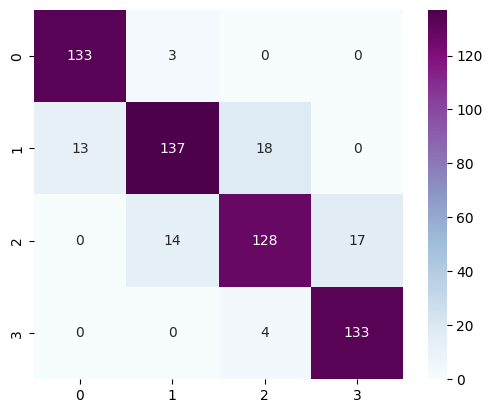

In [26]:
print("\033[1m ************************ LOGISTIC REGRESSION MODEL RESULTS ************************ \033[0m")
print('Accuracy score of testing set', round(accuracy_score(y_test, y_pred_log_reg),2), '\n')
print('Precision score of testing set', round(precision_score(y_test, y_pred_log_reg,average="weighted"),2), '\n')
print('Recall score of testing set', round(recall_score(y_test, y_pred_log_reg,average="weighted"),2), '\n')
print('F1 score of testing set', round(f1_score(y_test, y_pred_log_reg,average="weighted"),2), '\n')
cm_log_reg = confusion_matrix(y_test,y_pred_log_reg)
sns.heatmap(cm_log_reg, annot=True, square=True, fmt='1', cmap = 'BuPu')
plt.show()

### **2. Random Forest Classifier**

In [27]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

 ************************ Random Forest Classifier MODEL RESULTS ************************ 
Accuracy score of testing set 0.87 

Precision score of testing set 0.86 

Recall score of testing set 0.87 

F1 score of testing set 0.87 



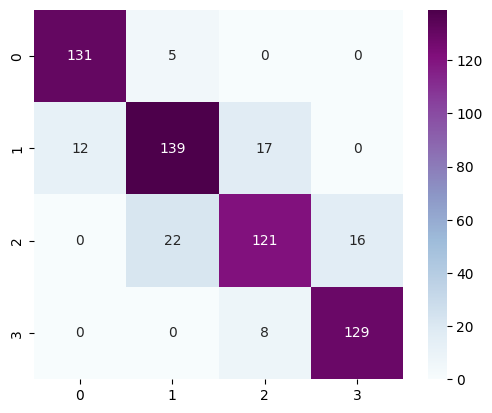

In [28]:
print("\033[1m ************************ Random Forest Classifier MODEL RESULTS ************************ \033[0m")
print('Accuracy score of testing set', round(accuracy_score(y_test, y_pred_rfc),2), '\n')
print('Precision score of testing set', round(precision_score(y_test, y_pred_rfc,average="weighted"),2), '\n')
print('Recall score of testing set', round(recall_score(y_test, y_pred_rfc,average="weighted"),2), '\n')
print('F1 score of testing set', round(f1_score(y_test, y_pred_rfc,average="weighted"),2), '\n')
cm_rfc = confusion_matrix(y_test,y_pred_rfc)
sns.heatmap(cm_rfc, annot=True, square=True, fmt='1', cmap = 'BuPu')
plt.show()

### **3. Decision Tree Classifier**

In [29]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_dt = dtc.predict(X_test)

 ************************ Decision Tree Classifier MODEL RESULTS ************************ 
Accuracy score of testing set 0.82 

Precision score of testing set 0.82 

Recall score of testing set 0.82 

F1 score of testing set 0.82 



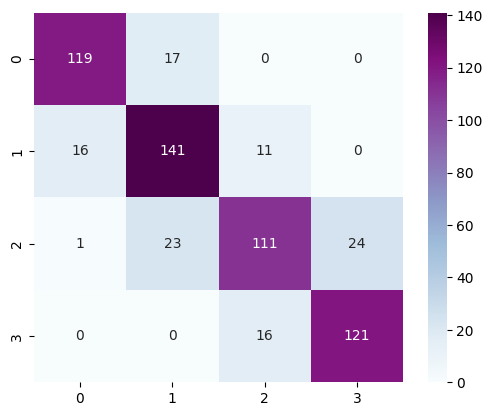

In [30]:
print("\033[1m ************************ Decision Tree Classifier MODEL RESULTS ************************ \033[0m")
print('Accuracy score of testing set', round(accuracy_score(y_test, y_pred_dt),2), '\n')
print('Precision score of testing set', round(precision_score(y_test, y_pred_dt,average="weighted"),2), '\n')
print('Recall score of testing set', round(recall_score(y_test, y_pred_dt,average="weighted"),2), '\n')
print('F1 score of testing set', round(f1_score(y_test, y_pred_dt,average="weighted"),2), '\n')
cm_dtc = confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cm_dtc, annot=True, square=True, fmt='1', cmap = 'BuPu')
plt.show()

### **4. KNN Classifier**

In [31]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

 ************************ K Neighbors Classifier MODEL RESULTS ************************ 
Accuracy score of testing set 0.41 

Precision score of testing set 0.42 

Recall score of testing set 0.41 

F1 score of testing set 0.82 



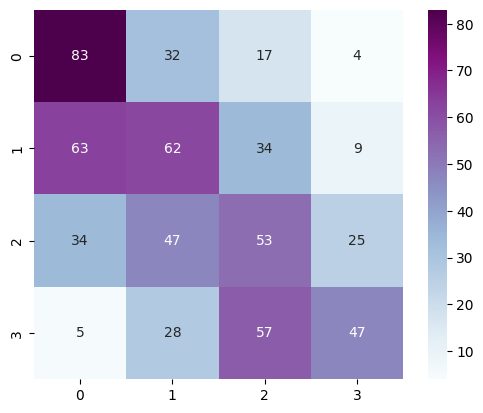

In [32]:
print("\033[1m ************************ K Neighbors Classifier MODEL RESULTS ************************ \033[0m")
print('Accuracy score of testing set', round(accuracy_score(y_test, y_pred_knn),2), '\n')
print('Precision score of testing set', round(precision_score(y_test, y_pred_knn,average="weighted"),2), '\n')
print('Recall score of testing set', round(recall_score(y_test, y_pred_knn,average="weighted"),2), '\n')
print('F1 score of testing set', round(f1_score(y_test, y_pred_dt,average="weighted"),2), '\n')
cm_knn = confusion_matrix(y_test,y_pred_knn)
sns.heatmap(cm_knn, annot=True, square=True, fmt='1', cmap = 'BuPu')
plt.show()

## **Model Comparison**

### Accuracy // 3-Fold Cross-Validated

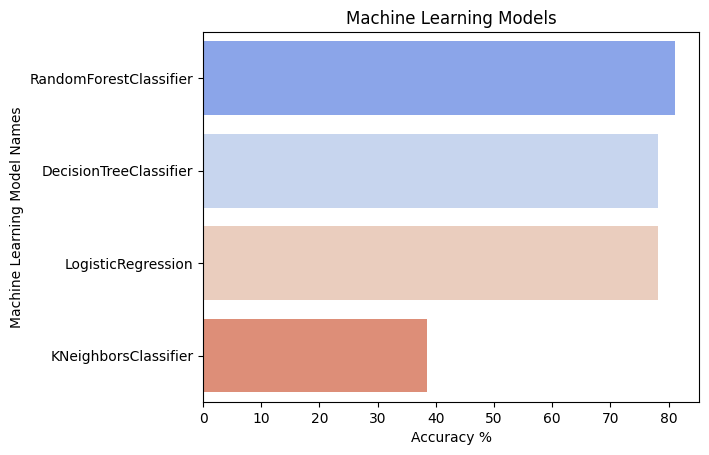

In [33]:
models = [log_reg, rfc, dtc, knn]

result_accuracy = []
results_accuracy = pd.DataFrame(columns=["Models", "Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = cross_val_score(model, X_test, y_test, cv=3, scoring="accuracy", n_jobs=-1).mean()
    result_accuracy = pd.DataFrame([[names, accuracy*100]], columns=["Models", "Accuracy"])
    results_accuracy = results_accuracy._append(result_accuracy)
    
sns.barplot(x='Accuracy', y='Models', data=results_accuracy.sort_values(by='Accuracy',ascending=False), palette="coolwarm")
plt.xlabel('Accuracy %')
plt.ylabel("Machine Learning Model Names")
plt.title("Machine Learning Models", loc="center")
plt.show();

In [34]:
results_accuracy.sort_values(by='Accuracy',ascending=False)

,Models,Accuracy
0,RandomForestClassifier,81.166667
0,DecisionTreeClassifier,78.166667
0,LogisticRegression,78.166667
0,KNeighborsClassifier,38.500000


### F1Score // 3-Fold Cross-Validated

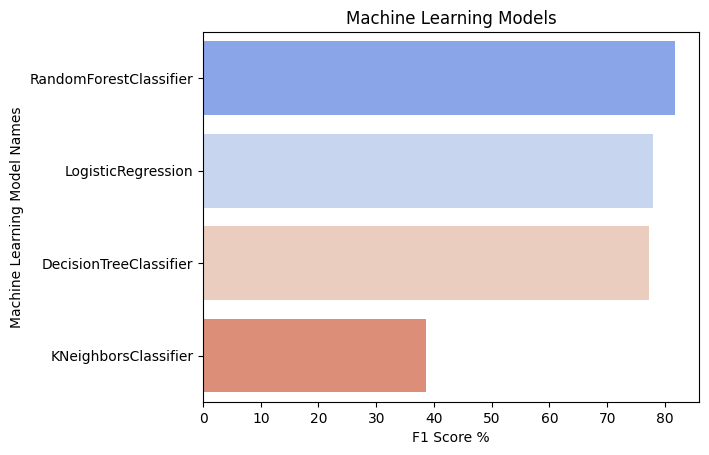

In [35]:
models = [log_reg, rfc, dtc, knn]

result_accuracy = []
results_accuracy = pd.DataFrame(columns=["Models", "F1 Score"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    f1_score = cross_val_score(model, X_test, y_test, cv=3, scoring="f1_weighted", n_jobs=-1).mean()
    result_accuracy = pd.DataFrame([[names, f1_score*100]], columns=["Models", "F1 Score"])
    results_accuracy = results_accuracy._append(result_accuracy)

sns.barplot(x='F1 Score', y='Models', data=results_accuracy.sort_values(by='F1 Score',ascending=False), palette="coolwarm")
plt.xlabel('F1 Score %')
plt.ylabel("Machine Learning Model Names")
plt.title("Machine Learning Models", loc="center")
plt.show();

In [36]:
results_accuracy.sort_values(by='F1 Score',ascending=False)

,Models,F1 Score
0,RandomForestClassifier,81.824470
0,LogisticRegression,77.958988
0,DecisionTreeClassifier,77.186429
0,KNeighborsClassifier,38.551450


### **Hyperparameter Optimization** for RandomForestClassifier

In [37]:
rfc_parameters = {
    'n_estimators': [100, 200, 300], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9]
}

In [38]:
rfc_cv = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc_cv, rfc_parameters, cv=3).fit(X_train, y_train)
print("Best parameters of Random Forest Classifier:", str(rfc_grid.best_params_))

Best parameters of Random Forest Classifier: {'max_depth': 6, 'max_features': 'log2', 'max_leaf_nodes': 9, 'n_estimators': 100}


In [39]:
rfc_grid.best_estimator_

RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=9)

## **Tuned RandomForestClassifier**

In [40]:
rfc_tuned = RandomForestClassifier(max_depth=9, max_features='sqrt', max_leaf_nodes=9, n_estimators=100)
rfc_tuned.fit(X_train,y_train)
y_pred_rfc_tuned = rfc_tuned.predict(X_test)

 ************************ Random Forest Classifier Tuned Training MODEL RESULTS ************************ 
Accuracy score of testing set 0.82 

Precision score of testing set 0.82 

Recall score of testing set 0.83 

F1 score of testing set 0.82 

 ************************ Random Forest Classifier Tuned Testing MODEL RESULTS ************************ 
Accuracy score of testing set 0.81 

Precision score of testing set 0.79 

Recall score of testing set 0.79 

F1 score of testing set 0.79 



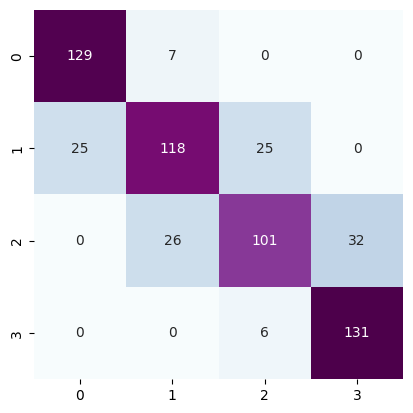

In [41]:
print("\033[1m ************************ Random Forest Classifier Tuned Training MODEL RESULTS ************************ \033[0m")
print('Accuracy score of testing set', round(cross_val_score(rfc_tuned, X_train, y_train, cv=3, scoring= 'accuracy').mean(),2), '\n')
print('Precision score of testing set', round(cross_val_score(rfc_tuned, X_train, y_train, cv=3, scoring= 'precision_weighted').mean(),2), '\n')
print('Recall score of testing set', round(cross_val_score(rfc_tuned, X_train, y_train, cv=3, scoring= 'recall_weighted').mean(),2), '\n')
print('F1 score of testing set', round(cross_val_score(rfc_tuned, X_train, y_train, cv=3, scoring= 'f1_weighted').mean(),2), '\n')

print("\033[1m ************************ Random Forest Classifier Tuned Testing MODEL RESULTS ************************ \033[0m")
print('Accuracy score of testing set', round(cross_val_score(rfc_tuned, X_test, y_test, cv=3, scoring= 'accuracy').mean(),2), '\n')
print('Precision score of testing set', round(cross_val_score(rfc_tuned, X_test, y_test, cv=3, scoring= 'precision_weighted').mean(),2), '\n')
print('Recall score of testing set', round(cross_val_score(rfc_tuned, X_test, y_test, cv=3, scoring= 'recall_weighted').mean(),2), '\n')
print('F1 score of testing set', round(cross_val_score(rfc_tuned, X_test, y_test, cv=3, scoring= 'f1_weighted').mean(),2), '\n')

cm_rfc = confusion_matrix(y_test,y_pred_rfc_tuned)
sns.heatmap(cm_rfc, annot=True, square=True, fmt='1', cmap = 'BuPu', cbar=False)
plt.show()

# **Feature Importance**

In [42]:
importance_df = pd.DataFrame({"Feature_Name":X.columns, "Importance":rfc_tuned.feature_importances_})
sorted_importance_df = importance_df.sort_values(by="Importance",ascending=False).head(10)
sorted_importance_df.head()

,Feature_Name,Importance
12,ram,0.726636
0,battery_power,0.079937
11,px_width,0.049541
10,px_height,0.048506
7,mobile_wt,0.017070


In [43]:
sorted_importance_df.tail()

,Feature_Name,Importance
5,int_memory,0.016275
8,n_cores,0.010449
14,sc_w,0.010000
6,m_dep,0.009356
9,pc,0.008669


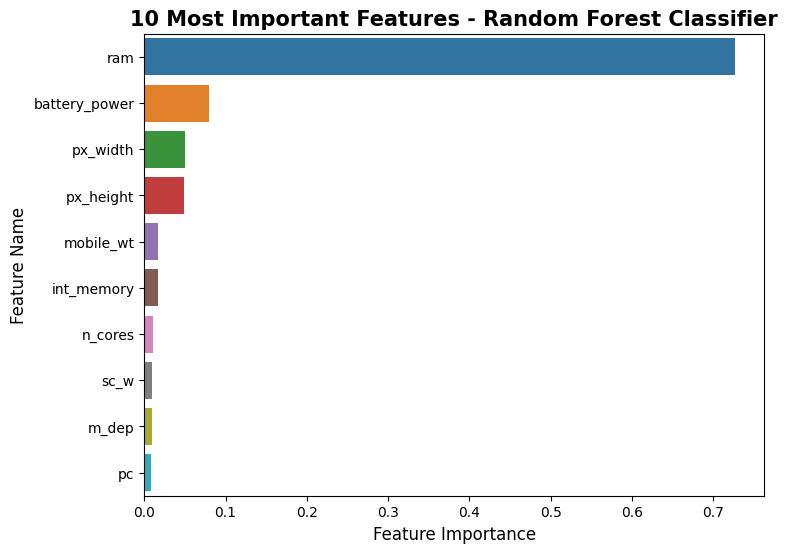

In [44]:
plt.figure(figsize=(8,6))
sns.barplot(data=sorted_importance_df, x='Importance', y='Feature_Name')
plt.title('10 Most Important Features - Random Forest Classifier',fontweight='bold',fontsize=15)
plt.xlabel('Feature Importance',fontsize=12)
plt.ylabel('Feature Name',fontsize=12)
plt.show()

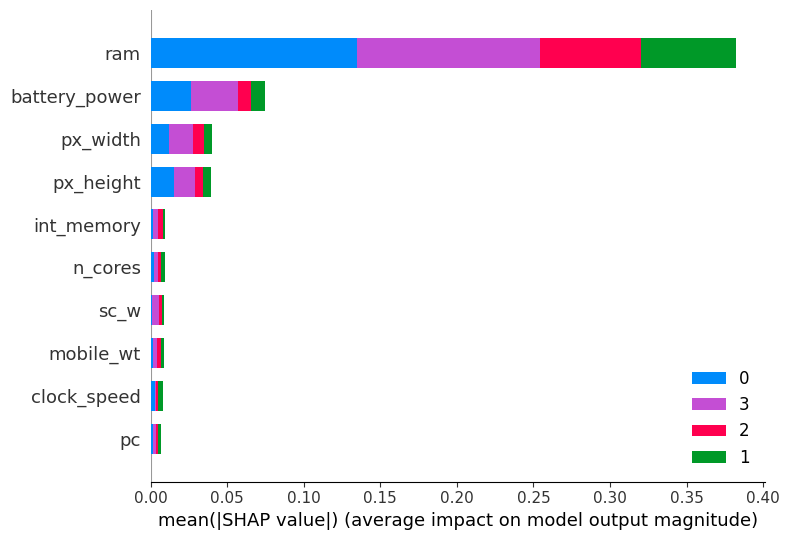

In [45]:
explainer = shap.TreeExplainer(rfc_tuned)
shap_values = explainer.shap_values(X_test[0:1000])
shap.summary_plot(shap_values,X_test[0:1000],plot_type='bar',max_display=10,class_names=rfc_tuned.classes_)

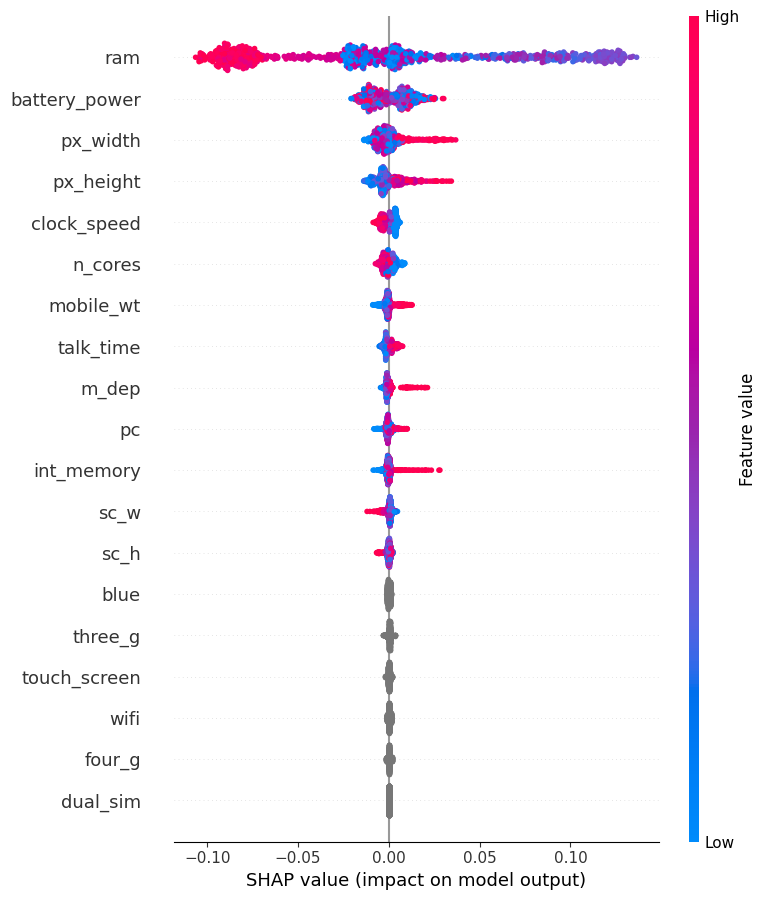

In [46]:
explainer = shap.TreeExplainer(rfc_tuned)
shap_values = explainer.shap_values(X_train[0:1000], approximate=False, check_additivity=False)
shap.summary_plot(shap_values[1], X_train[0:1000])

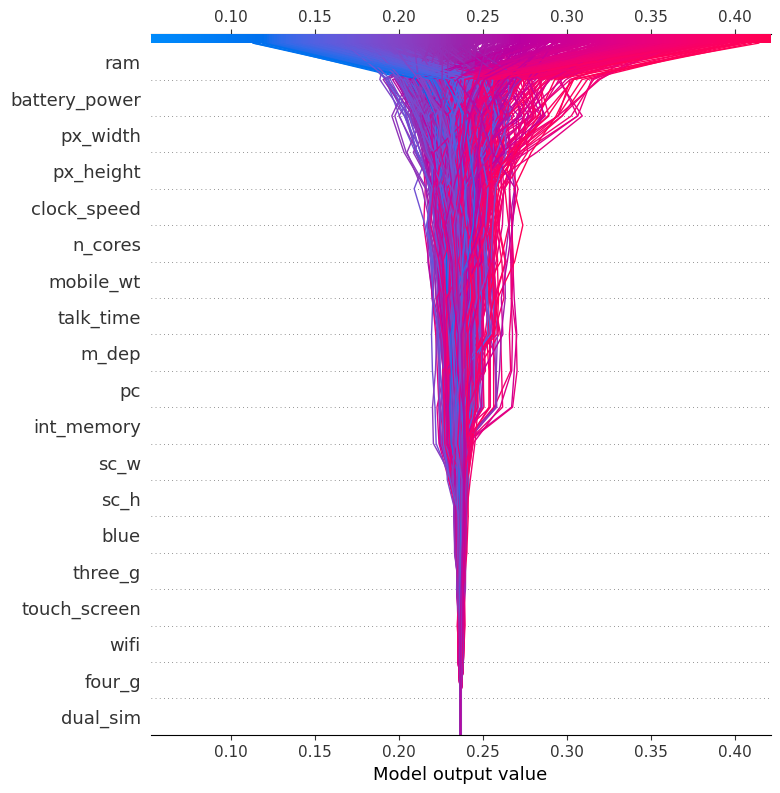

In [47]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], X)

# From bottom to top of the decision plot, shap values are cumulatively added to the base value of the model in determining the output values.
# It can be observed that certain strings colored in blue resulted in final class value 0 and the remaining strings colored in red resulted in final class value 1.